# Benchmark ComBind on PDB ligands

In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
results = {} # prot -> ({ligand: (combind, glide, best)...}, (combind, glide, best))

for fname in glob('../../combind_data/bpp_data/*/scores/pdb_seperated_hbond_pipi/pdb.sc'):
    prot = fname.split('/')[4]
    if prot not in results: results[prot] = [{}, None]
    with open(fname) as fp:
        fp.readline()
        for line in fp:
            tok = line.strip().split(',')
            if len(tok) == 3:
                results[prot][1] = map(lambda x: float(x.split('=')[1]), tok)
            else:
                lig,combind_rank,combind_rmsd,glide_rank,glide_rmsd,best_rank,best_rmsd = tok
                #if float(best_rmsd) > 2.0: continue
                results[prot][0][lig] = (float(combind_rmsd), float(glide_rmsd), float(best_rmsd)) 

In [3]:
for prot, ligs in results.items():
    print prot, len(ligs[0])
#     if len(ligs[0]) < 10:
#         del results[prot]

P00489 20
PLK1 11
MGLUR5 4
ERA 20
P07900 20
GLUT1 2
P18031 20
P56817 20
O60885 16
MEK1 20
JAK2 20
P00742 20
DTRANSP 8
P00749 20
P00734 20
P00760 20
B2AR 7
GCR 17
P24941 12
B1AR 11
VITD 20
A2AR 17
SMO 6
P03951 13
Q9Y233 20
CHK1 20
CDK2 20
AR 10
MR 12
STRANSP 4


Ttest_relResult(statistic=3.5891887670449911, pvalue=0.00036823979524849859)
Glide Average: 3.68207587368 0.435555555556
ComBind Average: 3.39932633598 0.46


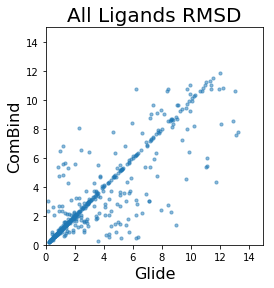

In [4]:
from scipy.stats import ttest_rel
x, y = [], []
for prot, ligs in results.items():
    for lig, (combind, glide, best) in ligs[0].items():
        x += [glide]
        y += [combind]

print ttest_rel(x, y)
f, ax = plt.subplots()
plt.scatter(x, y, alpha = 0.5, s = 10)
plt.xlabel('Glide', fontsize = 16)
plt.ylabel('ComBind', fontsize = 16)
plt.title('All Ligands RMSD', fontsize = 20)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.xticks(range(0, 15, 2), range(0, 15, 2))
ax.set_aspect('equal', 'box')
print 'Glide Average:', sum(x) / float(len(x)), sum(np.array(x) <= 2.0) /  float(len(x))
print 'ComBind Average:', sum(y) / float(len(y)), sum(np.array(y) <= 2.0) /  float(len(y))

3.80696129472 3.56944255467


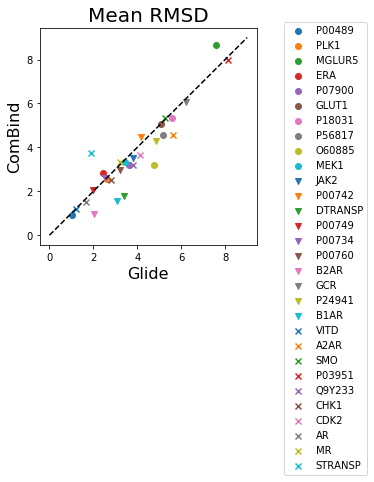

In [5]:
x, y, label = [], [], []
for prot, ligs in results.items():
    _x, _y = [], []
    for lig, (combind, glide, best) in ligs[0].items():
        #if best > 2.0: continue
        _x += [glide]
        _y += [combind]
    label += [prot]
    x += [sum(_x)/float(len(_x))]
    y += [sum(_y)/float(len(_y))]
    
markers = ['o', 'v', 'x', 's']
f, ax = plt.subplots()
for i, (_x, _y, _label) in enumerate(zip(x, y, label)):
    plt.scatter(_x, _y, marker = markers[i/10], label = _label)
plt.xlabel('Glide', fontsize = 16)
plt.ylabel('ComBind', fontsize = 16)
plt.title('Mean RMSD', fontsize = 20)
#plt.xlim(0, 5)
#plt.ylim(0, 5)
plt.plot(range(10), linestyle='--', c = 'k')
ax.set_aspect('equal', 'box')
print sum(x) / float(len(x)), sum(y) / float(len(y))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

P00489 20
PLK1 11
MGLUR5 4
ERA 20
P07900 20
GLUT1 2
P18031 20
P56817 20
O60885 16
MEK1 20
JAK2 20
P00742 20
DTRANSP 8
P00749 20
P00734 20
P00760 20
B2AR 7
GCR 17
P24941 12
B1AR 11
VITD 20
A2AR 17
SMO 6
P03951 13
Q9Y233 20
CHK1 20
CDK2 20
AR 10
MR 12
STRANSP 4
0.430368814192 0.468907913981


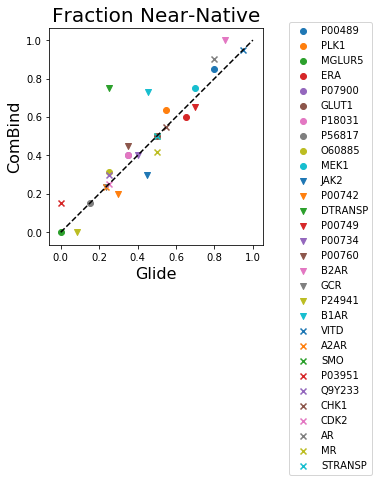

In [6]:
x, y = [], []
for prot, ligs in results.items():
    _x, _y = [], []
    for lig, (combind, glide, best) in ligs[0].items():
        _x += [glide <= 2.0]
        _y += [combind <= 2.0]
    label += [prot]
    print prot, len(_x)
    x += [sum(_x)/float(len(_x))]
    y += [sum(_y)/float(len(_y))]
    
markers = ['o', 'v', 'x', 's']
f, ax = plt.subplots()
for i, (_x, _y, _label) in enumerate(zip(x, y, label)):
    plt.scatter(_x, _y, marker = markers[i/10], label = _label)
plt.xlabel('Glide', fontsize = 16)
plt.ylabel('ComBind', fontsize = 16)
plt.plot(range(2), linestyle='--', c = 'k')
plt.title('Fraction Near-Native', fontsize = 20)
ax.set_aspect('equal', 'box')
print sum(x) / float(len(x)), sum(y) / float(len(y))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [7]:
for prot, ligs in results.items():
    print prot, ligs[1]

P00489 [4111.71449954755, 3951.514626810884, 3933.7258487540325]
PLK1 [930.9224340159282, 889.5998479475516, 843.0018914137207]
MGLUR5 [108.76769143278685, 83.51282049511775, 84.44141612224833]
ERA [4380.49325745615, 4339.383115960205, 4135.583757783888]
P07900 [2540.0977745160303, 2199.443015153607, 2040.549793742309]
GLUT1 [20.511340784176856, 20.392607800547722, 14.452601292322193]
P18031 [2363.4216871109384, 1120.1402541583113, 1815.0229975393634]
P56817 [2998.641690666486, 2493.5587320743675, 2056.721798972347]
O60885 [1891.4722219651778, 1718.7209916154318, 1495.5812155194717]
MEK1 [4276.466520913738, 4189.702071887759, 3279.7568299706663]
JAK2 [3581.615840942702, 3269.8453199120518, 2967.770104830827]
P00742 [3515.699511418574, 3358.9032684371196, 2495.266106436303]
DTRANSP [509.42151991507757, 383.88085336645287, 479.40516392296183]
P00749 [3849.986245403026, 3736.971159701078, 3272.1201265406576]
P00734 [3019.474552392984, 2890.520496712108, 2428.940054265463]
P00760 [3324.586

In [8]:
for lig, rmsds in results['SMO'][0].items():
    print lig, rmsds

5L7I_lig (1.965133802665073, 1.8379622213597098, 0.9138040419041752)
4O9R_lig (11.53036736833982, 11.511731832119763, 11.511731832119763)
4QIN_lig (7.18754548779533, 7.18754548779533, 6.91714525722448)
5V57_lig (0.33329986896948655, 0.33329986896948655, 0.33329986896948655)
4QIM_lig (1.5006375076430627, 1.5006375076430627, 1.215031414396402)
4N4W_lig (9.629267432710035, 9.134390231009537, 8.27013910227443)
